# 📊*Hypothesis Testing of Payment Methods* #
## Impact on Profit Margins: A Case Study Using Walmart Sample Data  ##

### 📌 Problem Statement:
 **Identify whether the mode of payment (Cash vs Ewallet) has a significant impact on the average profit margin.**

### 📚Importing Libraries and Loading Dataset ###

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm

In [12]:
df=pd.read_csv('walmart_clean.csv')
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,Total
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,604.17


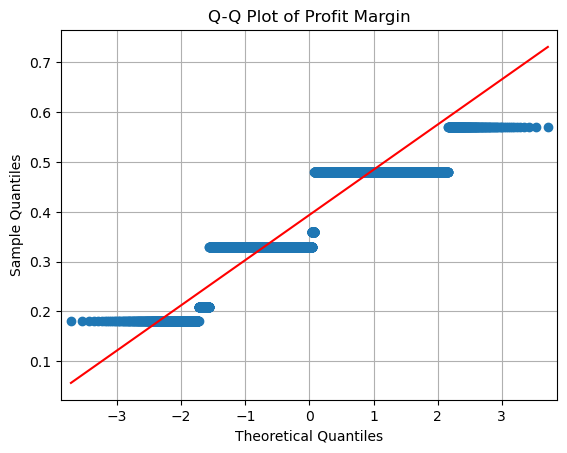

In [13]:
data = df['profit_margin'].dropna()  # dropna to avoid errors due to missing values

# Create QQ plot
sm.qqplot(data, line='s')  # line='s' adds a standardized 45-degree reference line
plt.title("Q-Q Plot of Profit Margin")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.show()

## 🧪 Hypothesis Formulation

#### H₀ (Null): There is no significant difference in the mean profit margin between Cash and Ewallet payments. ###
#### H₁ (Alt): There is a significant difference in average profit margin between the two. ###

 ## 📊 Data Sampling:

In [3]:
#filter dataset showing for  cash and Ewallet payment method
df_filtered= df[df['payment_method'].isin(['Cash', 'Ewallet'])]
df_filtered.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,Total
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48,76.40
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,604.17
5,6,WALM026,Denton,Electronic accessories,85.39,7.0,25/03/19,18:30:00,Ewallet,4.1,0.48,597.73


In [4]:
#let sample of profit_margin with cash payment as 'C'
C=df_filtered[df_filtered['payment_method']=='Cash']['profit_margin']
C

1       0.48
11      0.48
14      0.48
15      0.48
26      0.33
        ... 
9963    0.48
9964    0.33
9965    0.48
9967    0.48
9968    0.33
Name: profit_margin, Length: 1832, dtype: float64

In [5]:
#let sample of profit_margin with Ewallet payment as 'E'
E=df_filtered[df_filtered['payment_method']=='Ewallet']['profit_margin']
E

0       0.48
3       0.33
4       0.48
5       0.48
6       0.33
        ... 
8588    0.48
8592    0.48
8595    0.48
8621    0.48
8693    0.48
Name: profit_margin, Length: 3881, dtype: float64

## 📈 Descriptive Statistics:

In [58]:
# let mean_cash_sample as x1 
x1=np.mean(C)
x1

0.37563864628820964

In [59]:
# let mean_Ewallet_sample as x2
x2=np.mean(E)
x2

0.407446534398351

In [69]:
#let n1 as size of cash sample
#let n2 as size of Ewallet sample
n1,n2=C.shape[0],E.shape[0]
n1,n2

(1832, 3881)

In [70]:
#let s1 as std of cash sample
#let s2 as std of Ewallet sample

s1,s2=np.std(C),np.std(E)
s1,s2

(0.08864473517445862, 0.09057717409403442)

## 🧮 T-Test Calculation:

In [78]:
t_cal = (x1 - x2) / np.sqrt((s1**2)/n1 + (s2**2)/n2)
t_cal


-12.57004261811837

In [74]:
#calculation of df(degree of freedom)
num = ((s1**2)/n1 + (s2**2)/n2)**2
den = (((s1**2)/n1)**2)/(n1 - 1) + (((s2**2)/n2)**2)/(n2 - 1)
df = num / den
df

3660.923239309889

In [79]:
alpha = 0.05
t_critical = st.t.ppf(1 - alpha/2, df)
t_critical

1.960612193269359

## 🧾 Result Interpretation:

**As t_cal=12.57 > t_critical=1.96**
This means:
           ❌ **Reject the Null Hypothesis**

## 📌 Conclusion:

***There is a statistically significant difference in the average profit margin between customers who pay by Cash and those who use Ewallet, at the 95% confidence level.And since t_cal is negative:
It means the mean profit margin for Cash is significantly lower than that for Ewallet***



## 💡 Insight & Recommendation:

**Cash payments are associated with significantly lower profit margins compared to Ewallet transactions.
It is recommended that the company promote Ewallet usage through targeted offers or incentives, as it may lead to higher profitability per transaction.**

